# Load Data

In [15]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
path = 'I:\data_analyst\Data Crawler\Data x 1\Hasil_Preprocessing_DataPanasBumi.csv'
df = pd.read_csv(path)
df.sample(5)

,full_text,cleansing,Tokenization and Case Folding,Filtering / Stopword removal,stemming_data
47,@SiKebongce @kczeuha @xxxaryadi @herricahyadi ...,SiKebongce kczeuha xxxaryadi herricahyadi pada...,"['sikebongce', 'kczeuha', 'xxxaryadi', 'herric...","['sikebongce', 'kczeuha', 'xxxaryadi', 'herric...",sikebongce kczeuha xxxaryadi herricahyadi dulu...
67,Kenapa AC dirumah kalo hujan malah jadi panas ...,Kenapa AC dirumah kalo hujan malah jadi panas ...,"['kenapa', 'ac', 'dirumah', 'kalo', 'hujan', '...","['ac', 'dirumah', 'kalo', 'hujan', 'panas', 'y...",ac rumah kalo hujan panas ya cuaca panas subha...
131,"@hyunjinundip @undipmenfess kak mau tanya, ss ...",hyunjinundip undipmenfess kak mau tanya ss woo...,"['hyunjinundip', 'undipmenfess', 'kak', 'mau',...","['hyunjinundip', 'undipmenfess', 'kak', 'ss', ...",hyunjinundip undipmenfess kak ss woolworths ra...
437,@Hioghak 🔷:... una lastima que no se hacer eso...,Hioghak una lastima que no se hacer eso ya qu...,"['hioghak', 'una', 'lastima', 'que', 'no', 'se...","['hioghak', 'una', 'lastima', 'que', 'no', 'ha...",hioghak una lastima que no hacer eso ya que ht...
33,"@fayy_aja Pas lg panas kok, insyaallah amann",fayyaja Pas lg panas kok insyaallah amann,"['fayyaja', 'pas', 'lg', 'panas', 'kok', 'insy...","['fayyaja', 'pas', 'lg', 'panas', 'insyaallah'...",fayyaja pas lg panas insyaallah amann


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   full_text                      445 non-null    object
 1   cleansing                      445 non-null    object
 2   Tokenization and Case Folding  445 non-null    object
 3   Filtering / Stopword removal   445 non-null    object
 4   stemming_data                  445 non-null    object
dtypes: object(5)
memory usage: 17.5+ KB


In [9]:
df = pd.DataFrame(df['stemming_data'])
print(type(df))
df.sample(5)

<class 'pandas.core.frame.DataFrame'>


,stemming_data
131,hyunjinundip undipmenfess kak ss woolworths ra...
176,mackinprof i ve had a bunch of patients that c...
187,claramente todo normal xdddd
336,convomfs wahahaha muncul kepala gua putus nger...
422,jam drive jaga saif mintak air lepas air nak t...


In [10]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# nltk.download(['punkt','vader_lexicon'])

In [11]:
sia = SentimentIntensityAnalyzer()

labels = []
scores = []

for text in df['stemming_data']:
    sentiment_scores = sia.polarity_scores(text)
    compound_score = sentiment_scores['compound']

    scores.append(compound_score)

    if compound_score > 0:
        label = 'positif'
    elif compound_score < 0:
        label = 'negatif'
    else:
        label = 'netral'

    labels.append(label)

df['sentiment_score'] = scores
df['sentiment'] = labels

df.sample(5)

,stemming_data,sentiment_score,sentiment
259,ya allah lulusin ak utbk biar ak bs leluasa ma...,0.000,netral
266,duros esos panas,0.000,netral
254,aqu de colegueo con los panas httpstcoyytotqzv,0.000,netral
283,yo siempre eh dicho que son panas de uno la ge...,-0.296,negatif
339,hioghak no lo conozco solo pens que tenias uno...,-0.296,negatif


# VISUALISASI DATA

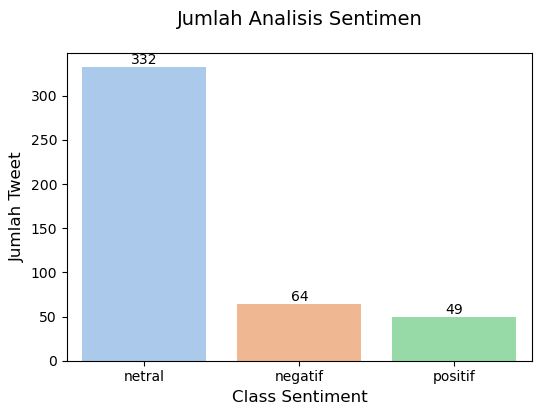

In [16]:
sentiment_count = df['sentiment'].value_counts()

# sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6,4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

for i, count in enumerate(sentiment_count.values):
    ax.text(i, count+0.10, str(count), va='bottom',ha='center')

plt.show()

# Save Data to CSV

In [ ]:
df.to_csv('Hasil_Labeling_DataPanasBumi_nltk.csv', encoding='utf8', index=False)